<a href="https://colab.research.google.com/github/Benjamin-Ojo/Quora-Insincere-Question-Classifier/blob/main/2.%20Notebooks/quora_insincere_question_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project: Quora Insincere Question Classifier**
---

# **Introduction** 
--- 




## Background: 

In today's digital age, social platforms have become hubs for information sharing and community engagement. Quora, one such platform, provides users with a platform to ask questions and receive answers from a diverse community. However, as with any open forum, there is a potential for misuse, where users may pose insincere or deceptive questions.

The classification of insincere questions is a significant challenge in natural language processing (NLP). It requires the ability to discern the underlying intent and identify questions that may be misleading, inflammatory, or offensive. Accurately detecting and categorizing these insincere questions is crucial to maintaining the quality and credibility of a platform like Quora.

In this project, we delve into the task of insincere question classification on Quora, using machine learning and NLP techniques. Our objective is to develop a robust and efficient model that can automatically differentiate between sincere and insincere questions.

## Dataset:

For our insincerity quest, we will leverage the Quora Insincere Questions Classification dataset, which is publicly available on Kaggle. This dataset comprises a large collection of questions from Quora, along with corresponding labels indicating whether each question is sincere or insincere. The dataset is annotated by human reviewers, providing valuable ground truth for training and evaluation purposes.

Our dataset are divided into training and testing dataset.The data contains the following columns: 

1. **qid**: This is a unique number for each of the question in our datasets. 
2. **question_text**: The full text of a Quora question. 
3. **target**: The label encoding on whether a question is sincere or not. 

## Approachs: 

To tackle this problem, we will adopt a supervised learning approach. We will explore various NLP techniques to build a classification model that can effectively distinguish between sincere and insincere questions. This will involve several key steps:

1. Data Collection: The Quora Insincere Questions Classification dataset is collected and downloaded from Kaggle. The dataset will be imported and processed using Google Colab. The data structures and features will be explored to gain a better understanding of the dataset.

2. Data Preprocessing: Text data is preprocessed by tokenization, lowercasing, and removal of stop words and punctuation. Techniques like stemming or lemmatization may be applied for further normalization.

3. Feature Extraction: The preprocessed text data will be transformed into numerical representations suitable for machine learning algorithms. For this project, we will be using word embeddings, such as Word2Vec or GloVe, to convert the text into dense vector representations that capture semantic relationships between words.

4. Model Selection and Training: For this project, we will explore various NLP models suitable for insincere question classification, such as recurrent neural networks (RNNs), convolutional neural networks (CNNs), or transformer models like BERT. These models have shown promising results in NLP tasks and can capture complex patterns and dependencies in text data. We will select the most appropriate model based on its performance on the validation dataset and train it using the labeled training dataset.

5. Model Evaluation: The trained NLP model will be evaluated using appropriate evaluation metrics, such as accuracy, precision, recall, and F1-score. The performance of the model will be assessed on the test dataset.



## Importing Packages:

In [1]:
# Data manipution packages. 
import pandas as pd
import numpy as np

# Data visualization packages.
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# File manager packages.
import os
import shutil
from zipfile import ZipFile
from google.colab import files
from IPython.display import display

# Tensoflow packages.
import tensorflow as tf
from tensorflow import keras
from keras.layers import Flatten, Conv1D, MaxPooling1D, Bidirectional, LSTM, RNN, GRU, Dropout
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential, Model
from keras.utils import pad_sequences

# Other packages.
from gensim.models import KeyedVectors
from sklearn.model_selection import train_test_split
%matplotlib inline

# **Data Collecion**
---

For this project we will be working from the kaggle notebook,and since our data is already in our working station we would just be loading our dataset from the kaggle input directory. 

To download this dataset from kaggle for colab and local system use, i will be providing commented code to help with this.

## Kaggle Data Import:

This commented code below is only for colab notebooks.

In [2]:
# Defining data directory.
!mkdir '1. Dataset'

In [3]:
# Install kaggle api with Pip. 
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Uploading Kaggle api token key.
files.upload()

In [5]:
# Changing api token location.
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/


In [6]:
# set the appropriate permissions 
!chmod 600 ~/.kaggle/kaggle.json

# verify api key.
!kaggle datasets list

ref                                                                   title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
arnabchaki/data-science-salaries-2023                                 Data Science Salaries 2023 💸                         25KB  2023-04-13 09:55:16          23131        645  1.0              
mauryansshivam/netflix-ott-revenue-and-subscribers-csv-file           Netflix OTT Revenue and Subscribers (CSV File)        2KB  2023-05-13 17:40:23           1284         32  1.0              
darshanprabhu09/stock-prices-for                                      Stock prices of Amazon , Microsoft , Google, Apple   85KB  2023-05-16 15:17:16           1205         34  1.0              
fatihb/coffee-quality-data-cqi

In [7]:
# Downloading dataset. 
!kaggle competitions download 'quora-insincere-questions-classification'

100% 6.02G/6.03G [01:35<00:00, 26.1MB/s]
100% 6.03G/6.03G [01:35<00:00, 67.8MB/s]


In [8]:
# Unzip folder. 
! unzip quora-insincere-questions-classification.zip -d '1. Dataset'

Archive:  quora-insincere-questions-classification.zip
  inflating: 1. Dataset/embeddings.zip  
  inflating: 1. Dataset/sample_submission.csv  
  inflating: 1. Dataset/test.csv     
  inflating: 1. Dataset/train.csv    


We will be importing and loading our training, and validation dataset.

In [9]:
# Checking input folder. 

## Defining a path exploral function. 

def path_exploral(dir_path:str): 
    for dirname, _, filenames in os.walk(dir_path):
        print(f"Directory name: {dirname}")
        print(f"File name: {filenames}\n")
    
        for filename in filenames:
            print(os.path.join(dirname, filename))
        print('\n\n')

## Checking the input folder. 
data_dir = '/content/1. Dataset'

path_exploral(data_dir)

Directory name: /content/1. Dataset
File name: ['embeddings.zip', 'train.csv', 'sample_submission.csv', 'test.csv']

/content/1. Dataset/embeddings.zip
/content/1. Dataset/train.csv
/content/1. Dataset/sample_submission.csv
/content/1. Dataset/test.csv





In [10]:
# Unzipping file. 

## Emebedding zip directory.
emb_zip_dir = os.path.join(data_dir,'embeddings.zip' )

## Extracting emebedding data file
def unzip_folder(source_dir: str, destination_dir: str):
    with ZipFile(source_dir) as zip_dir:
        zip_dir.extractall(destination_dir)

unzip_folder(emb_zip_dir, data_dir)

## Checking dataset folder on updated files.
path_exploral(data_dir)

Directory name: /content/1. Dataset
File name: ['embeddings.zip', 'train.csv', 'sample_submission.csv', 'test.csv']

/content/1. Dataset/embeddings.zip
/content/1. Dataset/train.csv
/content/1. Dataset/sample_submission.csv
/content/1. Dataset/test.csv



Directory name: /content/1. Dataset/paragram_300_sl999
File name: ['paragram_300_sl999.txt', 'README.txt']

/content/1. Dataset/paragram_300_sl999/paragram_300_sl999.txt
/content/1. Dataset/paragram_300_sl999/README.txt



Directory name: /content/1. Dataset/GoogleNews-vectors-negative300
File name: ['GoogleNews-vectors-negative300.bin']

/content/1. Dataset/GoogleNews-vectors-negative300/GoogleNews-vectors-negative300.bin



Directory name: /content/1. Dataset/glove.840B.300d
File name: ['glove.840B.300d.txt']

/content/1. Dataset/glove.840B.300d/glove.840B.300d.txt



Directory name: /content/1. Dataset/wiki-news-300d-1M
File name: ['wiki-news-300d-1M.vec']

/content/1. Dataset/wiki-news-300d-1M/wiki-news-300d-1M.vec





In [11]:
# Deleting all zip files. 
!rm /content/*.zip
!rm /content/1.\ Dataset/*.zip


In [12]:
# Checking folder for update.
path_exploral(data_dir)

Directory name: /content/1. Dataset
File name: ['train.csv', 'sample_submission.csv', 'test.csv']

/content/1. Dataset/train.csv
/content/1. Dataset/sample_submission.csv
/content/1. Dataset/test.csv



Directory name: /content/1. Dataset/paragram_300_sl999
File name: ['paragram_300_sl999.txt', 'README.txt']

/content/1. Dataset/paragram_300_sl999/paragram_300_sl999.txt
/content/1. Dataset/paragram_300_sl999/README.txt



Directory name: /content/1. Dataset/GoogleNews-vectors-negative300
File name: ['GoogleNews-vectors-negative300.bin']

/content/1. Dataset/GoogleNews-vectors-negative300/GoogleNews-vectors-negative300.bin



Directory name: /content/1. Dataset/glove.840B.300d
File name: ['glove.840B.300d.txt']

/content/1. Dataset/glove.840B.300d/glove.840B.300d.txt



Directory name: /content/1. Dataset/wiki-news-300d-1M
File name: ['wiki-news-300d-1M.vec']

/content/1. Dataset/wiki-news-300d-1M/wiki-news-300d-1M.vec





## Data import & review:

In [13]:
#  Loading training and testing dataframe.

## File directories. 
train_dir = os.path.join(data_dir, 'train.csv')
test_dir = os.path.join(data_dir, 'test.csv')
sample_sub_dir = os.path.join(data_dir, 'sample_submission.csv')

## Importing files to dataframes.
train_df = pd.read_csv(train_dir)
test_df = pd.read_csv(test_dir)
sample_sub_df = pd.read_csv(sample_sub_dir)


In [14]:
# View data.

## Training dataset.
print("\t\t\t##### Training Dataset #####")
display(train_df.head(10))
print('\n\n')

## Testing dataset.
print("\t\t\t##### Testing Dataset #####")
display(test_df.head(10))
print('\n\n')

## Sample Submission dataset. 
print("\t\t\t##### Sample Submission Dataset #####")
display(sample_sub_df.head(10))
print('\n\n')

			##### Training Dataset #####


,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0
5,00004f9a462a357c33be,"Is Gaza slowly becoming Auschwitz, Dachau or T...",0
6,00005059a06ee19e11ad,Why does Quora automatically ban conservative ...,0
7,0000559f875832745e2e,Is it crazy if I wash or wipe my groceries off...,0
8,00005bd3426b2d0c8305,"Is there such a thing as dressing moderately, ...",0
9,00006e6928c5df60eacb,Is it just me or have you ever been in this ph...,0





			##### Testing Dataset #####


,qid,question_text
0,0000163e3ea7c7a74cd7,Why do so many women become so rude and arroga...
1,00002bd4fb5d505b9161,When should I apply for RV college of engineer...
2,00007756b4a147d2b0b3,What is it really like to be a nurse practitio...
3,000086e4b7e1c7146103,Who are entrepreneurs?
4,0000c4c3fbe8785a3090,Is education really making good people nowadays?
5,000101884c19f3515c1a,How do you train a pigeon to send messages?
6,00010f62537781f44a47,What is the currency in Langkawi?
7,00012afbd27452239059,"What is the future for Pandora, can the busine..."
8,00014894849d00ba98a9,My voice range is A2-C5. My chest voice goes u...
9,000156468431f09b3cae,How much does a tutor earn in Bangalore?





			##### Sample Submission Dataset #####


,qid,prediction
0,0000163e3ea7c7a74cd7,0
1,00002bd4fb5d505b9161,0
2,00007756b4a147d2b0b3,0
3,000086e4b7e1c7146103,0
4,0000c4c3fbe8785a3090,0
5,000101884c19f3515c1a,0
6,00010f62537781f44a47,0
7,00012afbd27452239059,0
8,00014894849d00ba98a9,0
9,000156468431f09b3cae,0


In [15]:
# Data structure

## Data columns. 
print("\t\t---------> Dataset Columns <---------")
print(f"Training Columns: \n\t{train_df.columns}\n")
print(f"Testing Columns: \n\t{test_df.columns}\n\n")

## Data Shape.
print("\t\t---------> Data Shape <---------")
print(f"Train data Shape: \n\tRows -> {train_df.shape[0]} \n\tColumns -> {train_df.shape[1]}\n")
print(f"Train data Shape: \n\tRows -> {test_df.shape[0]} \n\tColumns -> {test_df.shape[1]}\n\n")

## Null data. 
print("\t\t---------> Null Data <---------")
print(f"Number of train data null values: \n{train_df.isnull().sum()}\n")
print(f"Number of test data null values: \n{test_df.isnull().sum()}\n\n")

## Data info
print("\t\t---------> Data Info <---------")
print(f"Train data info: \n{train_df.info()}\n")
print(f"Test data info: \n{test_df.info()}\n\n")

		---------> Dataset Columns <---------
Training Columns: 
	Index(['qid', 'question_text', 'target'], dtype='object')

Testing Columns: 
	Index(['qid', 'question_text'], dtype='object')


		---------> Data Shape <---------
Train data Shape: 
	Rows -> 1306122 
	Columns -> 3

Train data Shape: 
	Rows -> 375806 
	Columns -> 2


		---------> Null Data <---------
Number of train data null values: 
qid              0
question_text    0
target           0
dtype: int64

Number of test data null values: 
qid              0
question_text    0
dtype: int64


		---------> Data Info <---------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1306122 entries, 0 to 1306121
Data columns (total 3 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   qid            1306122 non-null  object
 1   question_text  1306122 non-null  object
 2   target         1306122 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 29.9+ MB
Train data info: 
None



## Data Visualization: 


For this phase of analysis we will need to visualize of dataset in other to gain a better understanding of the distribution of our data and how best to optimize of model when training. 

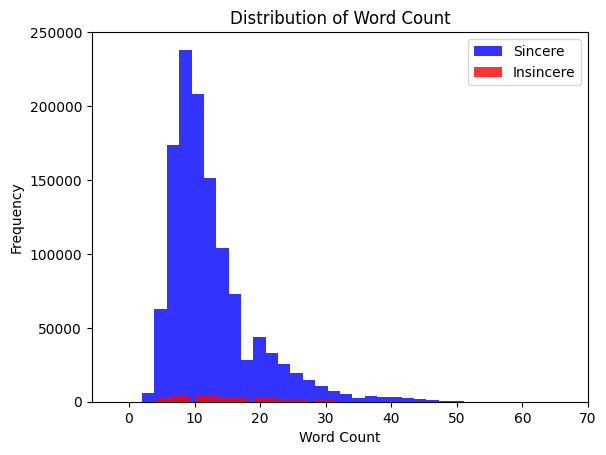

In [16]:
# Plotting Word count distribution. 

## Creating word count column.
train_df['word_count'] = train_df['question_text'].apply(lambda x: len(str(x).split()))

## Plotting word count distribution.
plt.hist(train_df['word_count'][train_df.target == 0], bins=70, 
         color='blue', alpha=0.8)
plt.hist(train_df['word_count'][train_df.target == 1], bins=70, 
         color='red', alpha=0.8)
plt.xlim(right=70)

## Plot labels
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.title('Distribution of Word Count')
plt.legend(['Sincere', 'Insincere'])

## Display plot
plt.show();


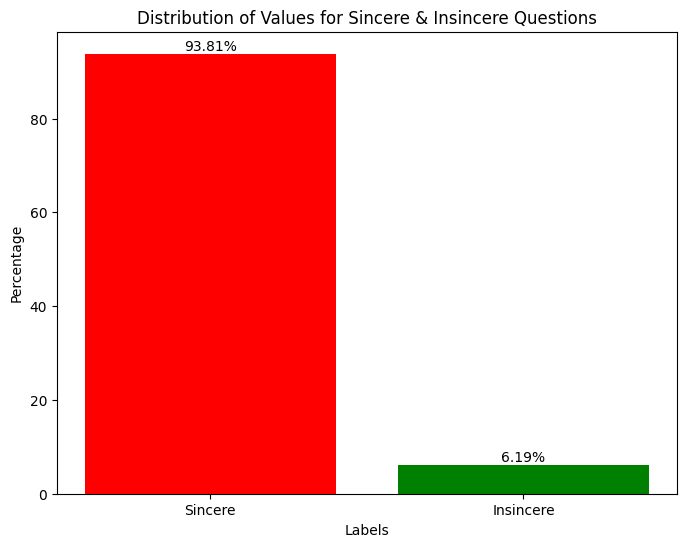

In [17]:
# Plotting Bar chart.

## Plot Size/Figure
plt.figure(figsize=(8, 6))

## Calculate the value counts and percentages for each value in the column
value_counts = train_df['target'].value_counts()
total_count = len(train_df)
percentages = (value_counts / total_count) * 100

## Plotting the bar chart
colors = ['red', 'green']
plt.bar(percentages.index, percentages.values, color=colors)

## Adding labels for each chart
plt.text(percentages.index[0], percentages.values[0], f'{percentages.values[0]:.2f}%', ha='center', va='bottom')
plt.text(percentages.index[1], percentages.values[1], f'{percentages.values[1]:.2f}%', ha='center', va='bottom')

## Plot labels and legend
plt.xlabel('Labels')
plt.ylabel('Percentage')
plt.xticks(percentages.index, ['Sincere', 'Insincere'])
plt.title('Distribution of Values for Sincere & Insincere Questions')

## Display plot
plt.show()


**Observation:**  
From the bar chart above we can see that the dataset isn't balance has we have more sincere data than insincere data. We will be taking note of this when training our model in other to have a well optimized model.

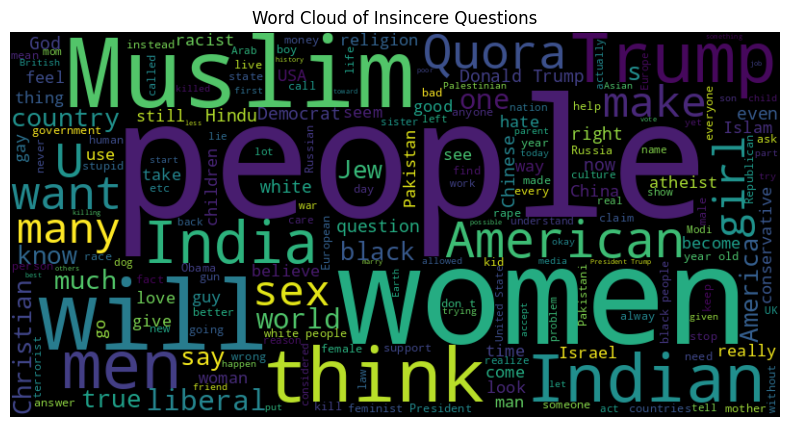

In [18]:
# Plotting a word cloud insincere question.

## Insincere word cloud function.
wordcloud = WordCloud(width=800, height=400).generate(' '.join(train_df['question_text'][train_df.target == 1]))

## Plot size/figure.
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')

## Plot labels
plt.axis('off')
plt.title('Word Cloud of Insincere Questions')

## Display plot
plt.show()


**Observation:** 

The most common words for insincere data seems to be about groups of people like Muslim, People, Women, girl, religion, American, etc.

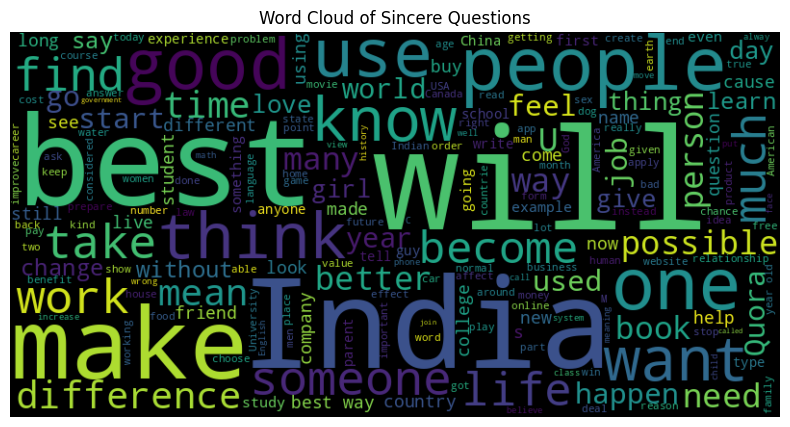

In [19]:
# Plotting a word cloud sincere question.

## Sincere word cloud function.
wordcloud = WordCloud(width=800, height=400).generate(' '.join(train_df['question_text'][train_df.target == 0]))

## Plot size/figure.
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')

## Plot labels
plt.axis('off')
plt.title('Word Cloud of Sincere Questions')

## Display plot
plt.show()


**Observation:** 

Compare to the insincere questions words in the sincere question segments are more general words. 

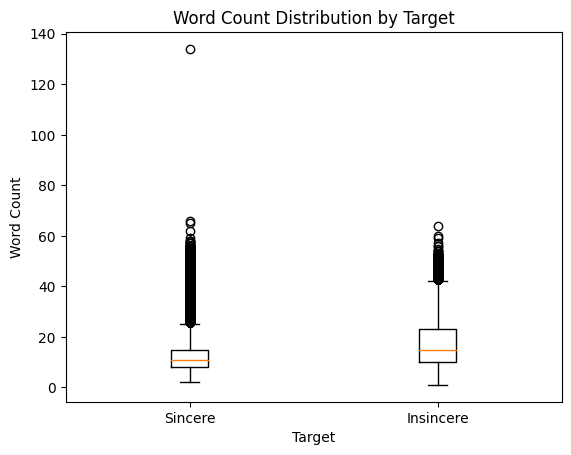

In [20]:
# Box Plot of word count

## Boxplot.
plt.boxplot([train_df[train_df['target'] == 0]['word_count'], train_df[train_df['target'] == 1]['word_count']],
            labels=['Sincere', 'Insincere'])

## Plot labels
plt.xlabel('Target')
plt.ylabel('Word Count')
plt.title('Word Count Distribution by Target')

## Display plot.
plt.show()


**Observation:** 

The box plot of word count for each question aren't similar in most metrics except from the 1st or 25% quartile & medium of both plot, has the minimum (without outliers), interquartile range, and maximum (without outliers) are higer with insincere questions

# **Data Preprocessing**
---

For this phase of our project we will be processing our data & importing our pretrained tokenizer. 

I will be using the glove pretrained tokenizer for our word converter to vectors. The tokenizer was provided with our dataset and we will be making use of this provided verstion. 

## Pretrained Tokenizer: 

In [31]:
# Embedding directory.
glove_dir = os.path.join(data_dir, 'glove.840B.300d/glove.840B.300d.txt')
ggle_vec_dir = os.path.join(data_dir, 'GoogleNews-vectors-negative300/GoogleNews-vectors-negative300.bin')
tokenizer = Tokenizer(num_words=500000, oov_token='<OOV>')

In [32]:
# Fitting text to tokenizer.

## Training tokenizer.
tokenizer.fit_on_texts(train_df.question_text.to_list())

## Testing tokenizer.
print(f"Question text ---> {train_df.question_text.to_list()[0]}\n\nToken ---> {tokenizer.texts_to_sequences([train_df.question_text.to_list()[0]])}")

Question text ---> How did Quebec nationalists see their province as a nation in the 1960s?

Token ---> [[10, 49, 6684, 7220, 159, 56, 6108, 37, 5, 1207, 7, 2, 8334]]


In [33]:
# Define token function. 

## Text to sequences converter.
def token_fn(text:str):
    token = tokenizer.texts_to_sequences([text])
    return token

## Sequences to text converter.
def text_fn(seq:list()):
    text = tokenizer.sequences_to_texts(seq)
    return text

## Testing functions. 
text = train_df.question_text.to_list()[0]
print(f"Question text: {text}\n")
print(f"Token_fn output: {token_fn(text)}\n")
print(f"Text_fn output: {text_fn(token_fn(text))}\n")

Question text: How did Quebec nationalists see their province as a nation in the 1960s?

Token_fn output: [[10, 49, 6684, 7220, 159, 56, 6108, 37, 5, 1207, 7, 2, 8334]]

Text_fn output: ['how did quebec nationalists see their province as a nation in the 1960s']



In [22]:
# Import Pretrained tokenizer.

## Load the pretrained word vectors
ggle_word_vec = KeyedVectors.load_word2vec_format(ggle_vec_dir, binary=True)


In [ ]:
# Access the vector for a specific word

## Words.
words = 'a star'

## Tokenizing function.
def ggle_word_fn(sentence: str):
    words_split = sentence.split()
    words_vectors = []
    for word in words_split:
        if word.lower() in ggle_word_vec:
            words_vectors.append(ggle_word_vec[word.lower()])
        else:
            continue
    return words_vectors

print(ggle_word_fn(words))


[array([ 0.1640625 ,  0.18847656,  0.14160156, -0.02941895,  0.02087402,
        0.13769531, -0.0168457 , -0.32617188,  0.07519531, -0.05200195,
        0.11816406,  0.09179688,  0.06689453, -0.04614258, -0.04321289,
        0.38476562,  0.0213623 , -0.09423828,  0.05712891,  0.18066406,
       -0.08740234,  0.3359375 , -0.078125  , -0.07861328, -0.02111816,
       -0.28320312,  0.08740234,  0.1796875 ,  0.11083984,  0.0480957 ,
       -0.00469971,  0.03857422,  0.01940918,  0.15332031,  0.07714844,
        0.01574707,  0.21875   ,  0.16113281, -0.14257812,  0.12695312,
        0.04736328, -0.48242188,  0.10302734,  0.11816406,  0.24316406,
       -0.00631714, -0.04858398,  0.05395508,  0.31835938,  0.16113281,
        0.0480957 ,  0.14941406, -0.15917969, -0.10351562, -0.17480469,
       -0.21484375,  0.03540039, -0.13671875, -0.203125  , -0.08007812,
       -0.00378418,  0.17675781,  0.02758789, -0.01501465,  0.10058594,
        0.16308594,  0.03588867,  0.11035156,  0.05932617,  0.0

In [ ]:
# # Import Pretrained tokenizer.

# ## Define an empty glove dictionary.
# glove_dict = {}
# line_coof = []
# line_word = []

# ## Input word and value from glove text file.
# with open(glove_dir, 'r', encoding='utf-8') as gd:
#     for line in gd:
#         line = line.split()
#         line_word.append(line[0])
#         line_coof.append(line[1:])

# ## test

# ### Remove text strings and convert remaining values to float
# for line in line_coof:
#     filtered_data = [float(value) for value in line if isinstance(value, str) and value.replace('.', '', 1).isdigit()]

# print(filtered_data)


# if line_coof:
#     line_coof = np.array(line_coof, dtype=np.float32)
#     glove_dict[line_word] = line_coof

# ## Testing 
# train_words = train_df['question_text'][3]
# print(f'Text "{train_words}" --> {[[glove_dict[word]] for word in train_words.split()]}')


## Tokenizing Questions Text.

In [34]:
# Tokenzering question. 

## Tokenizing training data. 
train_df['question_token'] = train_df.question_text.apply(lambda x: token_fn(x))

## Tokenizing testing data.
test_df['question_token'] = test_df.question_text.apply(lambda x: token_fn(x))

In [35]:
# Checking changs
display(train_df.head())
display(test_df.head())

,qid,question_text,target,word_count,question_token
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0,13,"[[10, 49, 6684, 7220, 159, 56, 6108, 37, 5, 12..."
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0,16,"[[12, 15, 25, 30, 3865, 499, 10, 36, 15, 3673,..."
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0,10,"[[17, 27, 2003, 375, 71, 27, 2003, 375, 452, 5..."
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0,9,"[[10, 49, 13006, 8285, 52193, 120, 2, 39878, 2..."
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0,15,"[[16, 9, 1131, 42988, 99431, 912, 6, 5, 3134, ..."


,qid,question_text,question_token
0,0000163e3ea7c7a74cd7,Why do so many women become so rude and arroga...,"[[17, 12, 53, 69, 125, 94, 53, 1807, 11, 4091,..."
1,00002bd4fb5d505b9161,When should I apply for RV college of engineer...,"[[33, 32, 9, 377, 14, 10368, 146, 8, 149, 11, ..."
2,00007756b4a147d2b0b3,What is it really like to be a nurse practitio...,"[[3, 4, 18, 134, 43, 6, 26, 5, 4521, 13112]]"
3,000086e4b7e1c7146103,Who are entrepreneurs?,"[[41, 13, 3987]]"
4,0000c4c3fbe8785a3090,Is education really making good people nowadays?,"[[4, 440, 134, 360, 54, 38, 2275]]"


## Spliting Training and Validation Data:

In [36]:
# Spliting dataset.

## Training data.
x_full_train_df, x_valid_df = train_test_split(train_df, test_size = 0.2, random_state = 42)
x_train_df, x_test_df = train_test_split(x_full_train_df, test_size=0.25 , random_state=42)

## View dataset.
print("\t\t\t\t\t\t------> X Full Training Dataset <------")
display(x_full_train_df.head(10))
print(f"\nShape ---> {x_full_train_df.shape}")

print("\n\n\t\t\t\t\t\t------> X Training Dataset <------")
display(x_train_df.head(10))
print(f"\nShape ---> {x_train_df.shape}")

print("\n\n\t\t\t\t\t\t------> X Validation Dataset <------")
display(x_valid_df.head(10))
print(f"\nShape ---> {x_valid_df.shape}")

print("\n\n\t\t\t\t\t\t------> X testing Dataset <------")
display(x_test_df.head(10))
print(f"\nShape ---> {x_test_df.shape}")

,qid,question_text,target,word_count,question_token
298773,3a820a95342d28ad402f,How is strategic positioning is different from...,0,9,"[[10, 4, 4722, 11447, 4, 131, 28, 417, 11447]]"
815475,9fca299caa0cf8f12eac,What is the best way for promote Facebook mark...,0,9,"[[3, 4, 2, 35, 80, 14, 1791, 326, 417]]"
1133453,de23f10ad011a6fb13c7,How much energized proton radiation does the I...,0,24,"[[10, 73, 25649, 6023, 2845, 27, 2, 5486, 205,..."
1076426,d2eef16340896e963a63,Would any Indian men want to marry a women tha...,0,13,"[[36, 51, 116, 166, 86, 6, 866, 5, 125, 20, 24..."
203792,27d584db9bd46b6ab44e,Which is the best business for startups in Ind...,0,12,"[[31, 4, 2, 35, 142, 14, 2041, 7, 58, 22, 1192..."
215745,2a32d88f871fcb1b70d1,Why do NIT students do overactions for everyth...,0,14,"[[17, 12, 1063, 218, 12, 119738, 14, 553, 7, 2..."
982650,c083a67ec534b8ed27ef,Why are orbits important?,0,4,"[[17, 13, 12039, 217]]"
509193,63b4c20dbf648bd7e96a,What should be my approach before talking to a...,0,10,"[[3, 32, 26, 19, 1228, 145, 889, 6, 5, 180]]"
893778,af1e4f921bbdc46e159d,What are some differentiating characteristics ...,0,11,"[[3, 13, 39, 37156, 833, 70, 5433, 11079, 11, ..."
60109,0bcc152fbce3b293ce56,Should I pursue a degree in finance?,0,7,"[[32, 9, 879, 5, 318, 7, 1054]]"



Shape ---> (1044897, 5)


						------> X Training Dataset <------


,qid,question_text,target,word_count,question_token
1081543,d3f1c40c0fbcf82a4f62,What are the chances that Catalonians will far...,0,16,"[[3, 13, 2, 741, 20, 69356, 42, 6322, 103, 7, ..."
723506,8da64788c62a8f430b23,How is the newly launched Asus Zenfone Max Pro...,0,35,"[[10, 4, 2, 4144, 4816, 6007, 17994, 3608, 112..."
47594,09517e9ef56ece54d620,What is the difference between ENTSOG and GIE?,0,8,"[[3, 4, 2, 127, 70, 103845, 11, 74152]]"
78645,0f651a1d4f42aaaff490,Are smokers and alcoholics not selected in SSB?,0,8,"[[13, 11756, 11, 17084, 45, 1516, 7, 3256]]"
1155124,e2583c0cb8975b5c2322,Why won't accept Jesus into your hearts?,0,7,"[[17, 1019, 746, 1105, 102, 29, 7320]]"
1182681,e7c2c02ec38f4456612d,"When it's okay for girls to wear shorts, why i...",0,25,"[[33, 264, 699, 14, 237, 6, 507, 6570, 17, 4, ..."
664371,821d1be43f8f326bce35,Is Swift Navigation's Skylark just a network R...,0,9,"[[4, 3902, 162033, 162034, 97, 5, 900, 162035,..."
606949,76daab0d454ff98afc8b,Have you ever seen the strongest cry?,0,7,"[[25, 15, 90, 558, 2, 3082, 2133]]"
512021,6446267aac5d93111de2,I would like to buy a scooter for my wife. Hav...,0,26,"[[9, 36, 43, 6, 183, 5, 8458, 14, 19, 676, 25,..."
1153056,e1ee21e38a060fa9dfae,Are IMU is good choice?,0,5,"[[13, 10013, 4, 54, 1045]]"



Shape ---> (783672, 5)


						------> X Validation Dataset <------


,qid,question_text,target,word_count,question_token
443046,56d324bb1e2c29f43b12,What is the most effective classroom managemen...,0,14,"[[3, 4, 2, 61, 573, 4520, 414, 2216, 3219, 6, ..."
947549,b9ad893dc78c577f8a63,Can I study abroad after 10th class from Bangl...,0,9,"[[16, 9, 185, 987, 60, 1531, 216, 28, 2067]]"
523769,6689ebaeeb65b209a412,How can I make friends as a college junior?,0,9,"[[10, 16, 9, 63, 252, 37, 5, 146, 3093]]"
949821,ba1e2c4a0fef09671516,How do I download free APK Minecraft: Pocket E...,0,12,"[[10, 12, 9, 691, 197, 13244, 5014, 5097, 3191..."
1030397,c9ea2b69bf0d74626f46,"Like Kuvera, is ""Groww"" also a free online inv...",0,18,"[[43, 84691, 4, 76480, 299, 5, 197, 153, 767, ..."
1277337,fa563b7aac874512f239,What is the precise definition for record in a...,0,11,"[[3, 4, 2, 7975, 1799, 14, 1540, 7, 1621, 743,..."
199566,27015d54cfc153fa92fe,What was Leonidas's role in the battle of Ther...,0,9,"[[3, 50, 118186, 521, 7, 2, 1479, 8, 49920]]"
1213793,ede75944d87c22b52225,How can we get universities in Germany with ou...,0,12,"[[10, 16, 52, 34, 804, 7, 525, 22, 79, 5750, 1..."
105499,14a6ec76db91719611e2,What's the remainder of 30^33/3?,0,5,"[[118, 2, 5612, 8, 787, 5383, 158]]"
552145,6c2e3c7e69177e4d197f,What is your mindset while learning a new skil...,0,11,"[[3, 4, 29, 4551, 133, 258, 5, 109, 2216, 24, ..."



Shape ---> (261225, 5)


						------> X testing Dataset <------


,qid,question_text,target,word_count,question_token
1145920,e086e488a2d3433baa39,What are some of the good books on quantum phy...,0,14,"[[3, 13, 39, 8, 2, 54, 224, 23, 1613, 448, 11,..."
982179,c06a776e5dd4f455d428,Why is the human body a good electricity condu...,0,16,"[[17, 4, 2, 236, 294, 5, 54, 1601, 5098, 21, 1..."
1196493,ea8099276f229886b041,How are the heart transplant surgeries in Dubai?,0,8,"[[10, 13, 2, 849, 4897, 11347, 7, 1484]]"
640407,7d6fcf0f55f0caa6057d,What are the best trade schools in the United ...,0,10,"[[3, 13, 2, 35, 1108, 749, 7, 2, 345, 278]]"
1303914,ff9060a795e1ed2d4461,How is it like to meet Siddharth Malhotra?,0,8,"[[10, 4, 18, 43, 6, 854, 45150, 28642]]"
891104,ae940321dd0715426159,What do you value most when recruiting a gradu...,0,18,"[[3, 12, 15, 415, 61, 33, 7252, 5, 770, 6, 26,..."
506558,632f8a6245fc6fcd7447,What would a modern day Tirpitz battleship loo...,0,9,"[[3, 36, 5, 559, 154, 56902, 17621, 200, 43]]"
151504,1da1612ba4ff18ebb989,Why do people take naps?,0,5,"[[17, 12, 38, 87, 18728]]"
1186559,e888778e007b74ce6f50,Is there anybody out here who is a follower of...,0,34,"[[4, 40, 1647, 79, 797, 41, 4, 5, 6768, 8, 154..."
716520,8c444855afeb034263c8,Who are superior surname in Brahmins?,1,6,"[[41, 13, 2154, 4003, 7, 4275]]"



Shape ---> (261225, 5)


In [ ]:
# Extracting training, validation, & testing data.

## Full training token.
x_full_train_df = x_full_train_df.question_token.to_list()

## Training token.
x_train_df = x_train_df.question_token.to_list()

## Validation token.
x_valid_df= x_valid_df.question_token.to_list()

## Test token.
x_test_df = x_test_df.question_token.to_list()

## Viewing dataset. 
print(f"X full training data ---> {len(x_full_train_df)}\n")
print(f"X training data ---> {len(x_train_df)}\n")
print(f"X training data ---> {len(x_valid_df)}\n")
print(f"X test data ---> {len(x_test_df)}\n")

print(f" Sample ---> {x_train_df[0][0]}")


X full training data ---> 1044897

X training data ---> 783672

X training data ---> 261225

X test data ---> 261225



NameError: ignored

In [ ]:
# Pad training, validation, & test data.

## Padding training data.
x_train = pad_sequences(x_train, padding='post', truncating='post', maxlen=50)
x_full_train = pad_sequences(x_full_train, padding='post', truncating='post', maxlen=50)

## Padding validation data.
x_valid = pad_sequences(x_valid, padding='post', truncating='post', maxlen=50)

## Padding testing data.
x_test= pad_sequences(x_test, padding='post', truncating='post', maxlen=50)

## View 
x_train_pd[0]

In [ ]:
# Extracting training and validation labels. 

## Full training labels. 
y_full_train = np.array(x_full_train_df.target.to_list(), dtype=np.int32)

## Train labels. 
y_train = np.array(x_train_df.target.to_list(), dtype=np.int32)

## Test labels. 
y_test = np.array(x_test_df.target.to_list(), dtype=np.int32)


## Viewing dataset. 
print(f"Y full training labels ---> {y_full_train}\n")
print(f"Y training labels ---> {y_train}\n")
print(f"Y test labels ---> {y_test}\n")
